# Better Policing Project

- Submitted By : Ashitosh Phadatare
- Institute 	 : National Insititute of Technology Karnataka , Surathkal (NITK)
- Course		 : Bachelors in Technology (BTech)
- Branch	     : Artificial Intelligence



## Assignment 2 - Missing value imputation

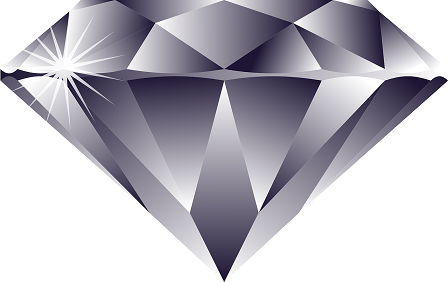

### Problem Statement
Simulate a real-world missing data scenario by using the OpenML diamonds dataset (note that scikit-learn has an inbuilt function for fetching OpenML datasets) and randomly setting 5% of the values in `carat` column to null. Further, use any suitable imputation method to regenerate the missing values. Use RMSE between the ground truth and regenerated missing values as the evaluation metric, and report your findings.
The solution should be sent as a link to a Colab/Kaggle notebook or a Github repository.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import random
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import accuracy_score

### Fetching the dataset from openML Diamond Dataset

In [2]:
raw_data =fetch_openml("diamonds", version=1, as_frame=True ).data

In [3]:
#Creating a deep copy for the original dataset without NaN values
raw_data
original_data = raw_data.copy(deep=True)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [5]:
noOfnan = int((0.052)*(raw_data.shape[0]))
noOfnan

2804

### Inserting 5% NaN values to the Dataset in carat column

In [6]:
def fillNan(totalNan , totalRows ):
  index_list = []
  for i in range(totalNan):
    randIndex = random.randint( 0 , totalRows)
    index_list.append(randIndex)
  return index_list

In [7]:
index_list = fillNan(noOfnan ,raw_data.shape[0]  )

In [8]:
for i in index_list:
    raw_data['carat'][i] = np.nan

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_20312\2030801539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['carat'][i] = np.nan


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    51214 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [10]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [11]:
raw_data_median = raw_data.copy(deep=True)
raw_data_KNN = raw_data.copy(deep=True)
raw_data_MICE = raw_data.copy(deep=True)

In [12]:
raw_data.isnull().mean() * 100


carat      5.053763
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.000000
table      0.000000
x          0.000000
y          0.000000
z          0.000000
dtype: float64

### Univariate Imputation

In [13]:
#univariate imputation 
data = pd.DataFrame([raw_data.carat]).T
data.columns = ['carat']

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_20312\3182781134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['carat'], bins=30)


<AxesSubplot: xlabel='carat', ylabel='Density'>

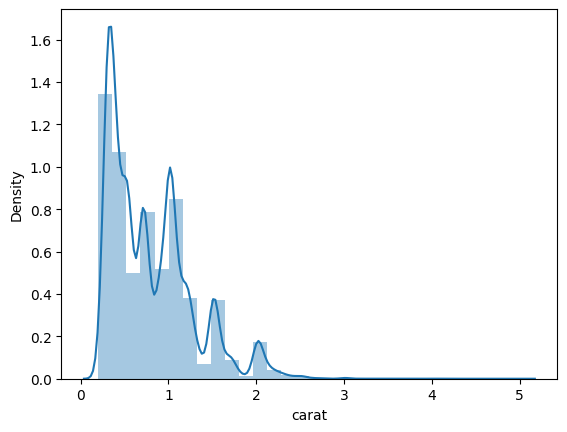

In [14]:
sns.distplot(data['carat'], bins=30)

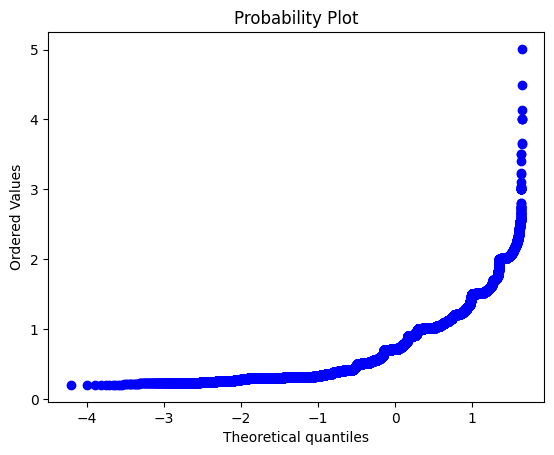

In [15]:
stats.probplot(data['carat'], dist="norm", plot=plt)
plt.show()

### Imputaion using Simple Imputer (Mean , Median)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [17]:
X = np.array(raw_data['carat']).reshape(1, -1)
X.shape

(1, 53940)

### Using Mean

In [18]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(raw_data[['carat']])
raw_data['carat'] = imr.transform(raw_data[['carat']]).ravel()

In [19]:
from sklearn.metrics import mean_squared_error

### RMS Error using mean Imputation

In [20]:
mse = mean_squared_error(raw_data['carat'], original_data['carat'])
rmse = math.sqrt(mse)
print("The RMSE with mean imputation is  " , rmse)

The RMSE with mean imputation is   0.1046682069372691


### Imputation using Median


In [21]:
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(raw_data_median[['carat']])
raw_data_median['carat'] = imr.transform(raw_data_median[['carat']]).ravel()

### RMS Error using Median

In [22]:
mse = mean_squared_error(raw_data_median['carat'], original_data['carat'])
rmse = math.sqrt(mse)
print("The RMSE with median imputation is  " , rmse)

The RMSE with median imputation is   0.1069159986855808


### KNN imputation


In [23]:
raw_data_KNN.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [24]:
raw_data_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    51214 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [25]:
raw_data_KNN.isnull().mean()

carat      0.050538
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.000000
table      0.000000
x          0.000000
y          0.000000
z          0.000000
dtype: float64

In [26]:
raw_data_KNN.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [27]:
imputer = KNNImputer(n_neighbors=3)
raw_data_KNN = pd.DataFrame(imputer.fit_transform(raw_data_KNN[['carat' ]]),columns = ['carat' ] )

In [28]:
raw_data_KNN.isnull().sum()

carat    0
dtype: int64

### RMS Error using KNN Imputation

In [29]:
mse = mean_squared_error(raw_data_KNN['carat'], original_data['carat'])
rmse = math.sqrt(mse)
print("The RMSE by KNN Imputation is " , rmse)


The RMSE by KNN Imputation is  0.1046682069372691
